In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Load Data

In [4]:
data = pd.read_csv('ex2data2.txt', names = ['Test1', 'Test2', 'Accepted'])
data.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


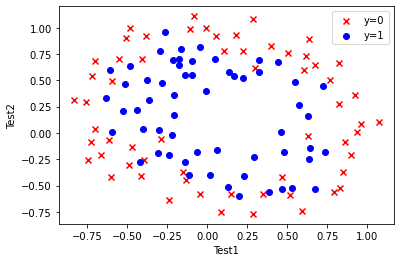

In [6]:
fig, ax = plt.subplots()
ax.scatter(data[data['Accepted']==0]['Test1'], data[data['Accepted']==0]['Test2'], c='r', marker='x', label='y=0')
ax.scatter(data[data['Accepted']==1]['Test1'], data[data['Accepted']==1]['Test2'], c='b', marker='o', label='y=1')
ax.legend()

ax.set(xlabel='Test1',
       ylabel='Test2')
plt.show()

#### Logistic Regression 

In [11]:
def feature_mapping(x1, x2, power):
    data = {}
    for i in np.arange(power+1):
        for j in np.arange(i+1):
            data['F{}{}'.format(i-j,j)]=np.power(x1,i-j)*np.power(x2,j)
    return pd.DataFrame(data)

In [9]:
x1 = data['Test1']
x2 = data['Test2']

In [12]:
data_mapping = feature_mapping(x1, x2, 6)
data_mapping.head()

,F00,F10,F01,F20,F11,F02,F30,F21,F12,F03,...,F23,F14,F05,F60,F51,F42,F33,F24,F15,F06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [13]:
X = data_mapping.values
y_ = data.iloc[:, -1]
y = y_.values.reshape((len(y_),1))

In [17]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [14]:
# loss function
# to avoid over fillting, adding a regulization item in loss function
# regulization type: L1, L2

def lossFunction(X, y, theta, lr):
    s = sigmoid(X @ theta)
    reg = np.sum(np.power(theta[1:],2))*(lr/(2*len(X))) # L2 regulization
    return -np.sum(y * np.log(s) + (1-y) * np.log(1-s))/len(X) + reg

In [15]:
theta = np.zeros((X.shape[1],1))
lr = 1

In [24]:
# gradient desent algorithm
def gradientDescent(X, y, theta, alpha, iters, lr):
    m = len(X)
    loss = []
    
    for i in range(iters):
        reg = theta[1:]*(lr/len(X))
        reg = np.insert(reg,0,values=0,axis=0)
        s = sigmoid(X @ theta)
        theta = theta - (alpha/m) * X.T @ (s-y)
        current_loss = lossFunction(X, y, theta, lr)
        loss.append(current_loss)
        
        if i%10000 == 0:
                print(current_loss)
        
    return theta, loss

In [20]:
alpha = 0.001
iters = 200000
lr = 0.001

In [25]:
theta_final, loss = gradientDescent(X, y, theta, alpha, iters, lr)

0.693134380798985
0.623739075192849
0.5838807434377024
0.554246409227113
0.5307549201007973
0.5115503262882626
0.49552779119569473
0.4819470194589525
0.470284452769261
0.46015776468100844
0.4512809771904487
0.44343581524143977
0.4364526995419595
0.4301977887670181
0.42456394762775773
0.4194643267673339
0.4148277172150451
0.4105951335106733
0.40671726240107314
0.40315253116960775


In [26]:
def predict(X, theta):
    prob = sigmoid(X @ theta)
    return [1 if x >= 0.5 else 0 for x in prob]

In [27]:
# prediction accuracy
y_pred = np.array(predict(X, theta_final))
y_pred = y_pred.reshape(len(y_pred), 1)

acc = np.mean(y_pred == y)
print(acc)

0.8135593220338984


#### Decision Boundary

In [28]:
x = np.linspace(-1.2,1.2,200)
xx, yy = np.meshgrid(x,x)
z = feature_mapping(xx.ravel(), yy.ravel(), 6).values
zz = z @ theta_final
zz = zz.reshape(xx.shape)

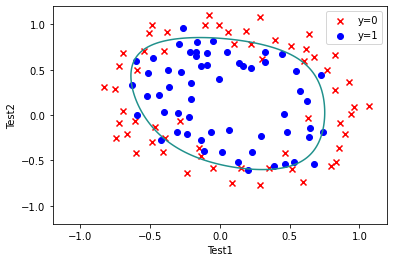

In [29]:
fig, ax = plt.subplots()
ax.scatter(data[data['Accepted']==0]['Test1'], data[data['Accepted']==0]['Test2'], c='r', marker='x', label='y=0')
ax.scatter(data[data['Accepted']==1]['Test1'], data[data['Accepted']==1]['Test2'], c='b', marker='o', label='y=1')
ax.legend()
ax.set(xlabel='Test1',
       ylabel='Test2')
plt.contour(xx,yy,zz,0)